In [2]:
import rasterio
from rasterio.merge import merge

directory = Path("/Users/xo/Downloads")

list_ = directory.glob("GHS_POP_E2015_*/**/*.tif")

sources = list(rasterio.open(directory / filename) for filename in list_)
dest_array, out_transform = merge(sources)

In [3]:
out_meta = sources[0].meta
out_meta.update(
    {
        "driver": "GTiff",
        "height": dest_array.shape[1],
        "width": dest_array.shape[2],
        "transform": out_transform,
    }
)

with rasterio.open("merged.tif", "w", **out_meta) as dest:
    dest.write(dest_array)

In [5]:
merged = rasterio.open("merged.tif")

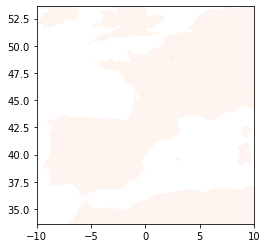

<AxesSubplot:>

In [8]:
from rasterio.plot import show

show(merged, cmap='Reds')

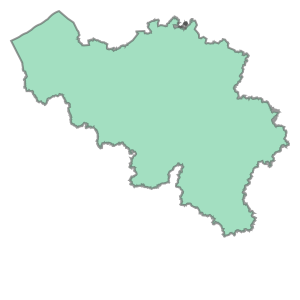

In [3]:
from cartes.osm import Nominatim
hg = Nominatim.search("belgique")
hg

In [6]:
import rasterio.mask

out_image, out_transform = rasterio.mask.mask(merged, [hg.shape], crop=True)

out_meta = merged.meta
out_meta.update(
    {
        "driver": "GTiff",
        "height": out_image.shape[1],
        "width": out_image.shape[2],
        "transform": out_transform,
    }
)

with rasterio.open("cropped.tif", "w", **out_meta) as dest:
    dest.write(out_image)

<GeoAxesSubplot:>

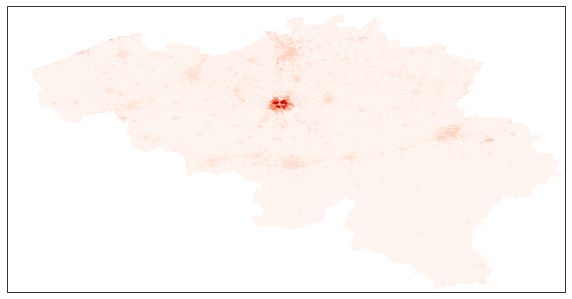

In [17]:

import matplotlib.pyplot as plt
import rasterio
from rasterio.plot import show
from cartes.crs import PlateCarree

cropped = rasterio.open("cropped.tif")

fig, ax =plt.subplots(figsize=(10, 10), subplot_kw=dict(projection=PlateCarree()))


show(cropped, cmap='Reds', ax=ax)

In [8]:
import rasterio
from rasterio.warp import calculate_default_transform, reproject, Resampling

dst_crs = "EPSG:2154"

with rasterio.open("cropped.tif") as src:
    transform, width, height = calculate_default_transform(
        src.crs, dst_crs, src.width, src.height, *src.bounds
    )
    kwargs = src.meta.copy()
    kwargs.update(
        {"crs": dst_crs, "transform": transform, "width": width, "height": height}
    )

    with rasterio.open("transformed.tif", "w", **kwargs) as dst:
        for i in range(1, src.count + 1):
            reproject(
                source=rasterio.band(src, i),
                destination=rasterio.band(dst, i),
                src_transform=src.transform,
                src_crs=src.crs,
                dst_transform=transform,
                dst_crs=dst_crs,
                resampling=Resampling.cubic_spline,
            )

In [14]:
import geopandas as gpd

github_url = "https://raw.githubusercontent.com/{user}/{repo}/master/{path}"

belgique = gpd.GeoDataFrame.from_file(
    github_url.format(user="arneh61", repo="Belgium-Map", path="Provincies.json",)
).assign(
    centroid_lon=lambda df: df.geometry.centroid.x,
    centroid_lat=lambda df: df.geometry.centroid.y,
)


In [27]:
%load_ext lab_black

In [54]:
from cartes.osm import Overpass

df = Overpass.request(area="Belgique", node=dict(place="city"))
df.data.query("population.notnull()").sort_values("population")

id_ 
 type_ 
 latitude 
 longitude 
 alt_name:nl 
 alt_name:wa 
 name 
 name:ar 
 name:de 
 name:fr 
 ... 
 name:tl 
 name:vo 
 ref:LOCODE 
 old_name:fr 
 old_name:la 
 alt_name:ar 
 alt_name:es 
 alt_name:mk 
 addr:postcode 
 name:ky 
 
 
 
 
 3 
 1448497912 
 node 
 50.879202 
 4.701168 
 NaN 
 Lovén;Vîye-Lovagne 
 Leuven 
 لوفان 
 Löwen 
 Louvain 
 ... 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 10 
 1765500676 
 node 
 50.466528 
 4.866189 
 NaN 
 NaN 
 Namur 
 نامور 
 Namur 
 Namur 
 ... 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 5000 
 NaN 
 
 
 6 
 1651558422 
 node 
 51.208553 
 3.226772 
 NaN 
 NaN 
 Brugge 
 بروج 
 Brügge 
 Bruges 
 ... 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 4 
 1635651356 
 node 
 50.846557 
 4.351697 
 NaN 
 NaN 
 Bruxelles - Brussel 
 بروكسل 
 Brüssel 
 Bruxelles 
 ... 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 8 
 1689207163 
 node 
 50.645138 
 5.573420 
 NaN 
 NaN 
 Liège 
 لييج 
 Lüttich 
 Liège 
 ... 
 NaN 
 NaN 
 NaN 
 Liége 
 Leodicum 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 0 
 9002746 
 node 
 50.412033 
 4.443624 
 Karelskoning 
 Chålerwè 
 Charleroi 
 شارلوروا 
 Charleroi 
 Charleroi 
 ... 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 7 
 1668655163 
 node 
 51.053829 
 3.725012 
 NaN 
 NaN 
 Gent 
 غنت 
 Gent 
 Gand 
 ... 
 Gante 
 Ghent 
 BEGNE 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 9 
 1765433658 
 node 
 51.221110 
 4.399708 
 NaN 
 NaN 
 Antwerpen 
 أنتويرب 
 Antwerpen 
 Anvers 
 ... 
 NaN 
 NaN 
 BEANDR 
 NaN 
 NaN 
 أنتفيرب 
 Antuerpia 
 Антверп 
 NaN 
 NaN 
 
 
 1 
 36162975 
 node 
 50.605646 
 3.387818 
 NaN 
 NaN 
 Tournai 
 NaN 
 NaN 
 Tournai 
 ... 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 5 
 1651555409 
 node 
 51.225856 
 2.919496 
 NaN 
 NaN 
 Oostende 
 NaN 
 Ostende 
 Ostende 
 ... 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 12 
 5458266808 
 node 
 50.827643 
 3.265988 
 NaN 
 NaN 
 Kortrijk 
 NaN 
 NaN 
 Courtrai 
 ... 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 Кортрейк 
 
 
 11 
 2573424360 
 node 
 51.028138 
 4.480345 
 NaN 
 NaN 
 Mechelen 
 NaN 
 Mecheln 
 Malines 
 ... 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 2 
 893278148 
 node 
 50.454957 
 3.951958 
 NaN 
 NaN 
 Mons 
 مونس 
 Bergen 
 Mons 
 ... 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 
 13 rows × 182 columns

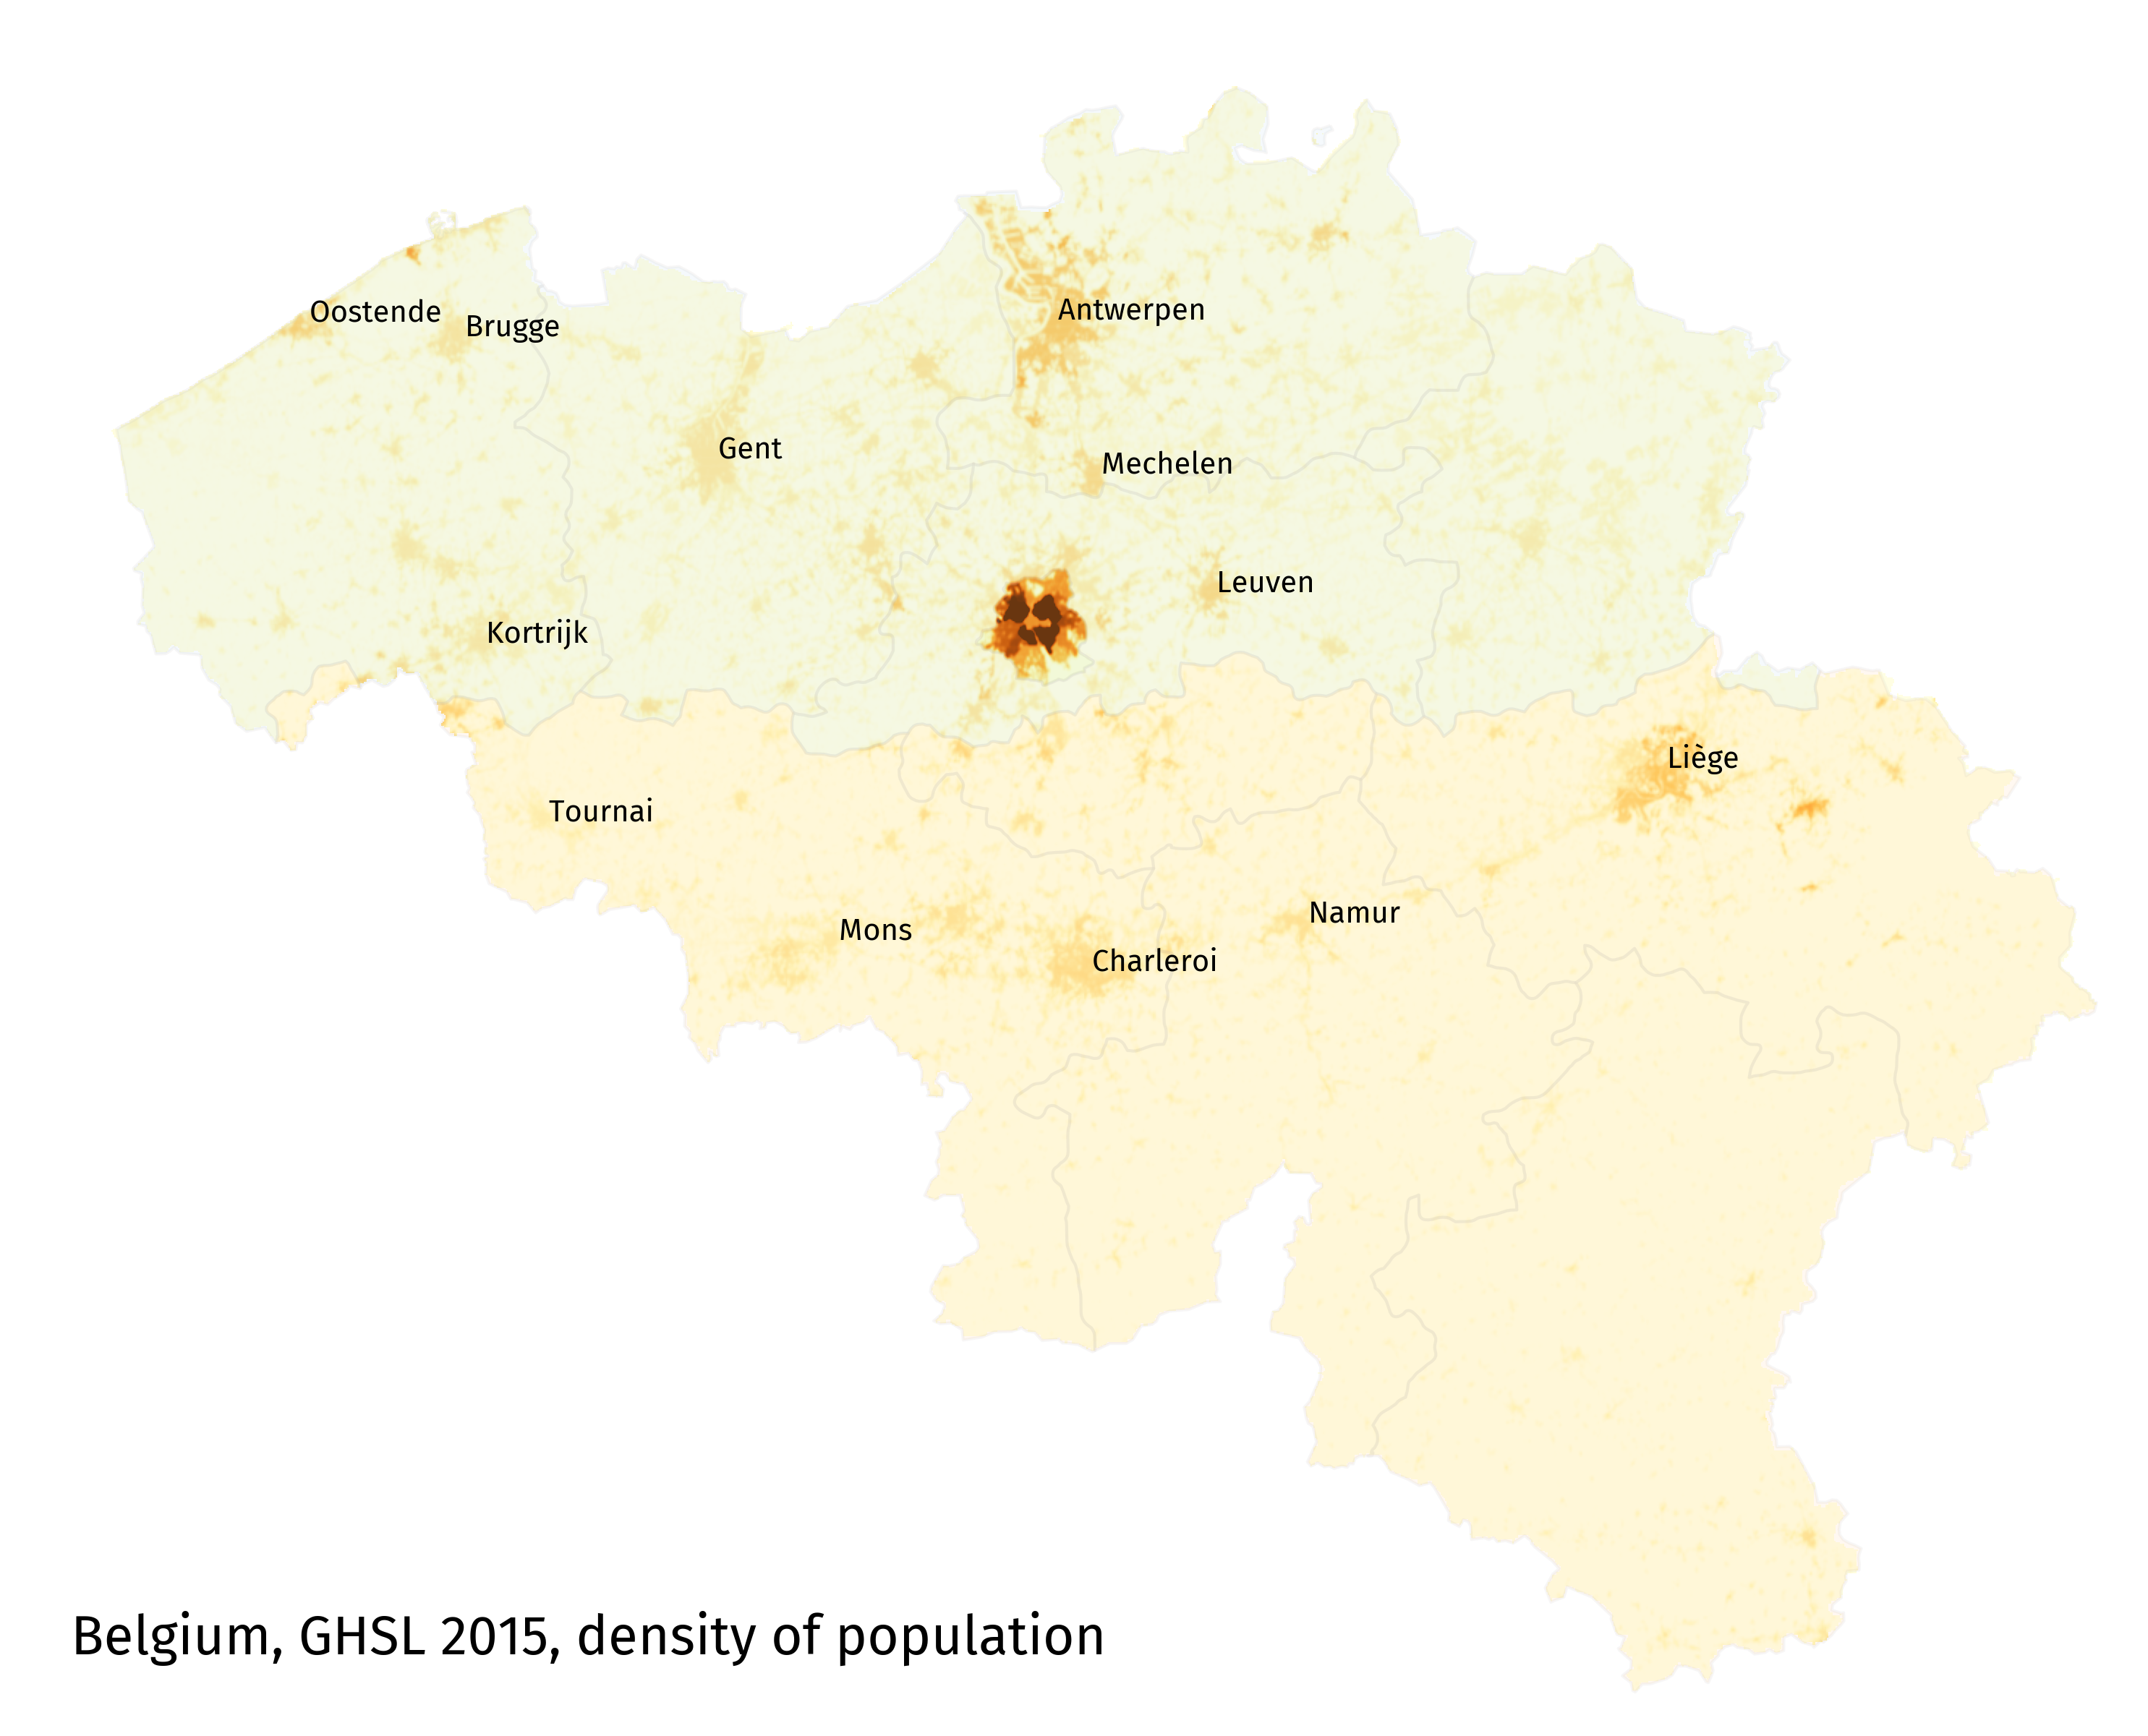

In [68]:
import matplotlib.pyplot as plt
import rasterio
from rasterio.plot import show
from cartes.crs import PlateCarree, Lambert93
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.offsetbox import AnchoredText


cropped = rasterio.open("transformed.tif")

fig, ax = plt.subplots(
    figsize=(10, 10), dpi=300, subplot_kw=dict(projection=Lambert93())
)

cmap = LinearSegmentedColormap.from_list("mycmap", ["#fffcfb", "#70615a"])

belgique.query('NAME_1 == "Vlaanderen"').set_crs(4326).to_crs(2154).plot(
    ax=ax,
    facecolor="#9ecae9",
    edgecolor="#bab0ac",
    linewidth=1,
    alpha=0.1,
)
belgique.query('NAME_1 == "Wallonie"').set_crs(4326).to_crs(2154).plot(
    ax=ax,
    facecolor="#ffbf79",
    edgecolor="#bab0ac",
    linewidth=1,
    alpha=0.1,
)
belgique.query('NAME_1 == "Bruxelles"').set_crs(4326).to_crs(2154).plot(
    ax=ax,
    facecolor="#88d27a",
    edgecolor="#bab0ac",
    linewidth=1,
    alpha=0.1,
)

show(cropped, cmap="YlOrBr", ax=ax, vmax=600)


text = AnchoredText(
    "Belgium, GHSL 2015, density of population",
    loc=3,
    frameon=False,
    prop={"size": 18, "fontname": "Fira Sans"},
)
ax.add_artist(text)

for _, line in df.data.iterrows():
    if line["name"] != "Bruxelles - Brussel":
        ax.text(
            line.longitude,
            line.latitude,
            " " + line["name"],
            transform=PlateCarree(),
            font="Fira Sans",
        )

ax.spines["geo"].set_visible(False)
fig.set_tight_layout(True)
fig.savefig("../contributions/challenge_day23.png", dpi=300, background="white")